# Eyad Ahmed AbdelFattah             
## 20191322456

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn_extra.cluster import KMedoids
df=pd.read_csv('gapminder_internet.csv')
data=df.sample(n=160,random_state=9)
data.drop(columns=['country'],inplace=True)
data=data.dropna()

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 27 to 186
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   incomeperperson  139 non-null    float64
 1   internetuserate  139 non-null    float64
 2   urbanrate        139 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


In [40]:
#normalize data 
scaler = preprocessing.MinMaxScaler()
names = data.columns
f = scaler.fit_transform(data)
scaled_df = pd.DataFrame(f, columns=names)
scaled_df.head()

,incomeperperson,internetuserate,urbanrate
0,0.029994,0.479697,0.677455
1,0.000629,0.071155,0.555134
2,0.029803,0.405239,0.759152
3,0.044662,0.127057,0.561830
4,0.020606,0.070786,0.140625


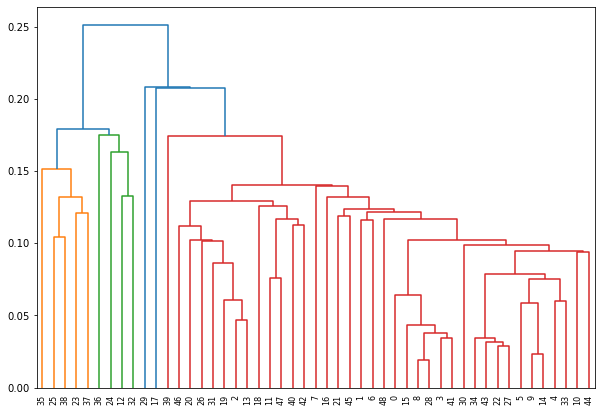

In [42]:
import scipy.cluster.hierarchy as shc
data_new=scaled_df.iloc[90:170,:].values
mat.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(data_new, method='single'))

In [32]:
scaled=pd.DataFrame(f, columns=names)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single').fit(scaled)
scaled_df['AgglomerativeClustering']=cluster.fit_predict(scaled_df)
scaled_df.AgglomerativeClustering.value_counts()

1    74
0    65
Name: AgglomerativeClustering, dtype: int64

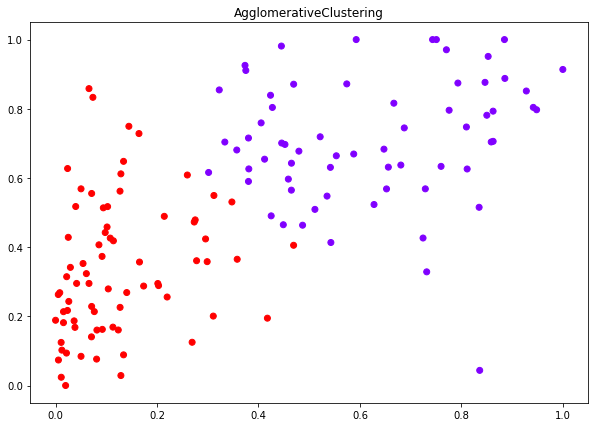

In [33]:
mat.figure(figsize=(10, 7))
mat.scatter(scaled_df.iloc[:,1],scaled_df.iloc[:,2], c=cluster.labels_, cmap='rainbow');
mat.title("AgglomerativeClustering");

In [34]:
kmedoids = KMedoids(n_clusters=2,metric="manhattan",random_state=0).fit(scaled)
scaled_df['KMedoids']=kmedoids.fit_predict(scaled)
scaled_df.KMedoids.value_counts()

0    74
1    65
Name: KMedoids, dtype: int64

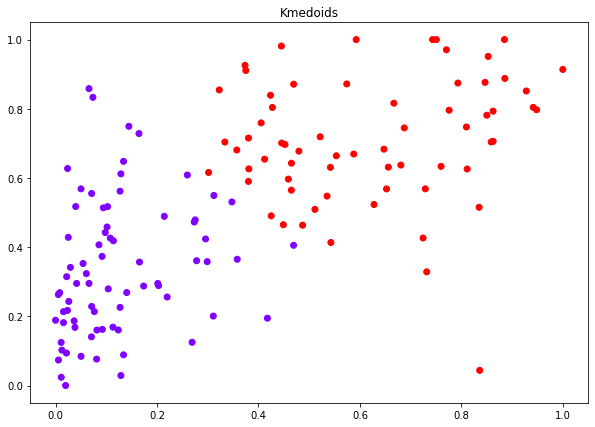

In [35]:
mat.figure(figsize=(10, 7))
mat.scatter(scaled_df.iloc[:,1],scaled_df.iloc[:,2], c=kmedoids.labels_, cmap='rainbow');
mat.title("Kmedoids");